In [67]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [68]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sms-spam-collection-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [72]:
df.shape

(5572, 5)

In [73]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

### 1. Data Cleaning

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [75]:
# drop the last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [76]:
df.sample(5)

,v1,v2
1437,ham,Wat so late still early mah. Or we juz go 4 di...
1304,ham,Your right! I'll make the appointment right now.
3264,spam,"44 7732584351, Do you want a New Nokia 3510i c..."
2300,ham,Nothin comes to my mind. ÌÏ help me buy hanger...
1020,ham,Good afternoon on this glorious anniversary da...


In [77]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'email'},inplace=True)
df.sample(5)

,target,email
1901,ham,"Sorry, I'll call later"
829,ham,Thanks for yesterday sir. You have been wonder...
1402,ham,You have registered Sinco as Payee. Log in at ...
3875,ham,did u get that message
1282,ham,Ever green quote ever told by Jerry in cartoon...


In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [79]:
df.sample(5)

,target,email
1971,0,Enjoy ur life. . Good night
4505,0,When are you guys leaving?
2829,0,Howz that persons story
3843,0,"Yeah that's what I thought, lemme know if anyt..."
1471,0,Oh. U must have taken your REAL Valentine out ...


In [80]:
# missing value
df.isnull().sum()

,0
target,0
email,0


In [81]:
df.duplicated().sum()

403

In [82]:
df = df.drop_duplicates(keep='first')
df.sample(5)

,target,email
1166,0,I am not having her number sir
5407,0,Yup he msg me: is tat yijue? Then i tot it's m...
1489,0,Ok i juz receive..
1044,1,We know someone who you know that fancies you....
1100,0,You busy or can I come by at some point and fi...


In [83]:
df.duplicated().sum()

0

In [84]:
df.shape

(5169, 2)

### 2. EDA

In [85]:
df.head()

,target,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


target
0    4516
1     653
Name: count, dtype: int64


<Axes: xlabel='target'>

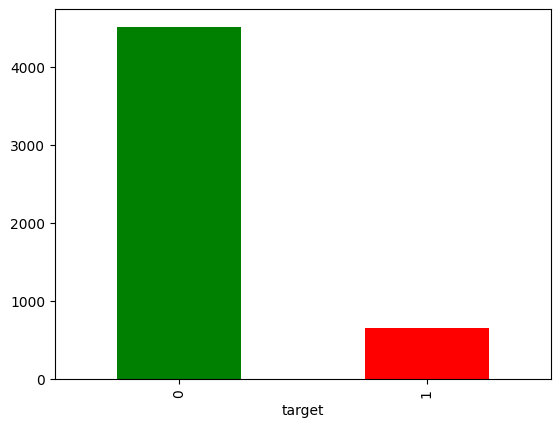

In [86]:
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='bar',color={'red','green'})

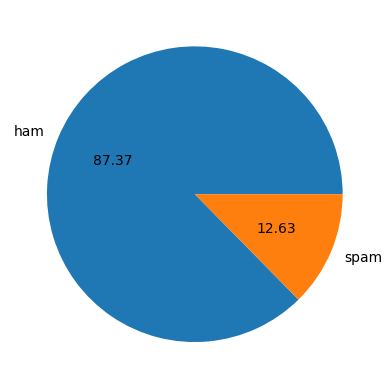

In [87]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [88]:
# Data is imbalanced

In [89]:
import nltk

In [90]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [91]:
df['number_of_character'] = df['email'].apply(len)
df.head()

,target,email,number_of_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
df['number_of_word'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [93]:
df.head()

,target,email,number_of_character,number_of_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [94]:
df['number_of_sentence'] = df['email'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [95]:
df.head()

,target,email,number_of_character,number_of_word,number_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [96]:
df[['number_of_character','number_of_word','number_of_sentence']].describe()

,number_of_character,number_of_word,number_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [97]:
df[df['target']==0][['number_of_character','number_of_word','number_of_sentence']].describe()

,number_of_character,number_of_word,number_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [98]:
df[df['target']==1][['number_of_character','number_of_word','number_of_sentence']].describe()

,number_of_character,number_of_word,number_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


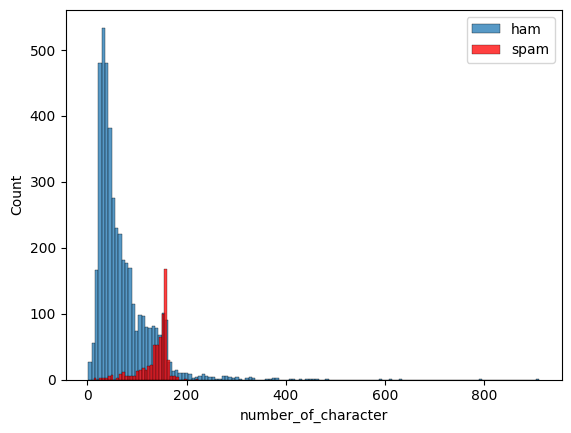

In [99]:
sns.histplot(df[df['target']==0]['number_of_character'],label='ham')
sns.histplot(df[df['target']==1]['number_of_character'],label='spam',color='red')
plt.legend()

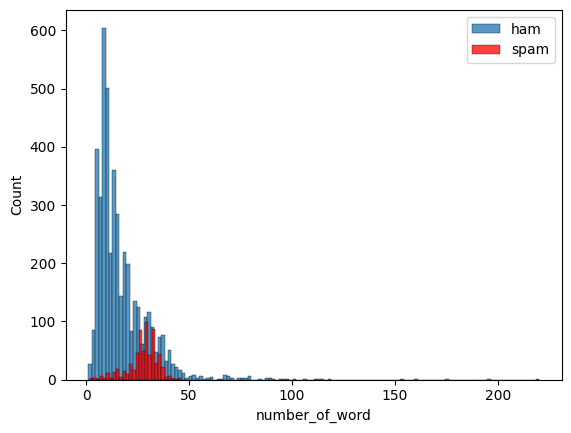

In [100]:
sns.histplot(df[df['target']==0]['number_of_word'],label='ham')
sns.histplot(df[df['target']==1]['number_of_word'],label='spam',color='red')
plt.legend()

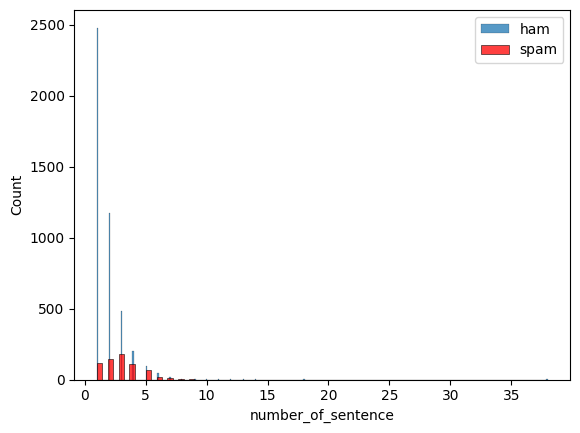

In [101]:
sns.histplot(df[df['target']==0]['number_of_sentence'],label='ham')
sns.histplot(df[df['target']==1]['number_of_sentence'],label='spam',color='red')
plt.legend()

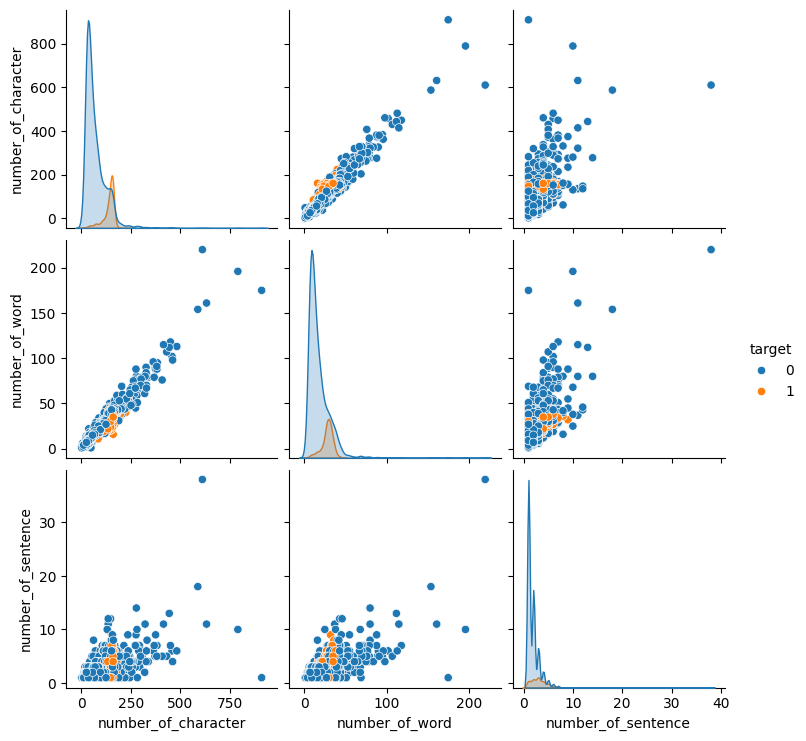

In [102]:
sns.pairplot(df,hue='target')

In [103]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,target,number_of_character,number_of_word,number_of_sentence
target,1.000000,0.384717,0.262912,0.263939
number_of_character,0.384717,1.000000,0.965760,0.624139
number_of_word,0.262912,0.965760,1.000000,0.679971
number_of_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

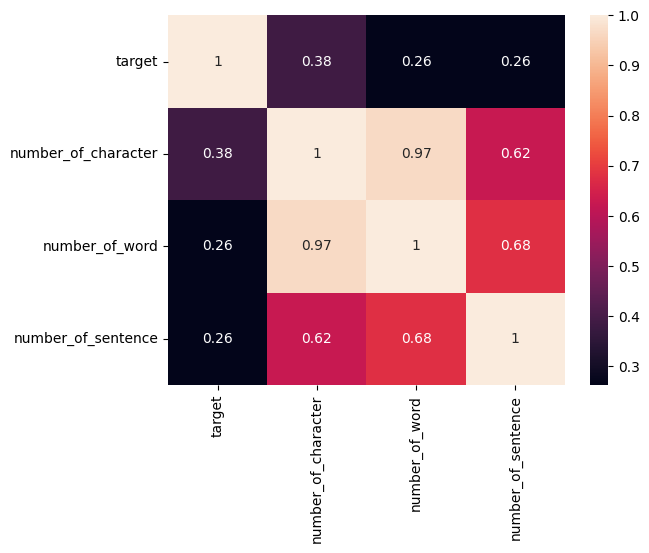

In [104]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Generate heatmap
sns.heatmap(numerical_df.corr(), annot=True)

### Data Preprocessing

In [105]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [106]:
df.sample(5)

,target,email,number_of_character,number_of_word,number_of_sentence
2866,0,"Mum, i've sent you many many messages since i ...",142,34,3
4778,0,O we cant see if we can join denis and mina? O...,74,18,2
5251,0,"Yeah work is fine, started last week, all the ...",99,24,1
5025,1,Ur cash-balance is currently 500 pounds - to m...,146,24,2
2838,0,"Easy mate, * guess the quick drink was bit amb...",53,12,1


In [107]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [108]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
# removing special character like %%
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [109]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [111]:
ps.stem('loving')

'love'

In [112]:
df['transform_text'] = df['email'].apply(transform_text)

In [113]:
df.head()

,target,email,number_of_character,number_of_word,number_of_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


wordcloud highlight the specific word because of that the email is spam or ham

In [114]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [115]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

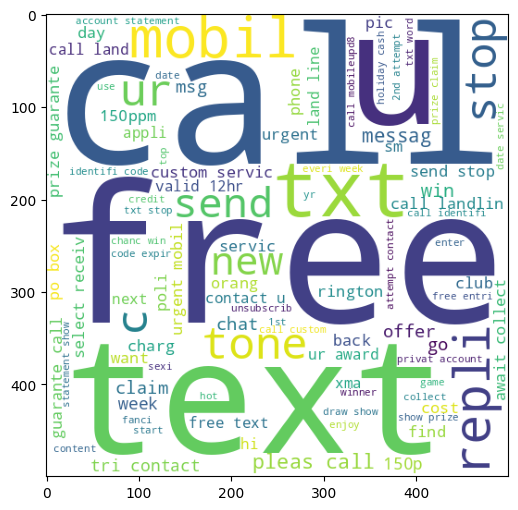

In [116]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [117]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

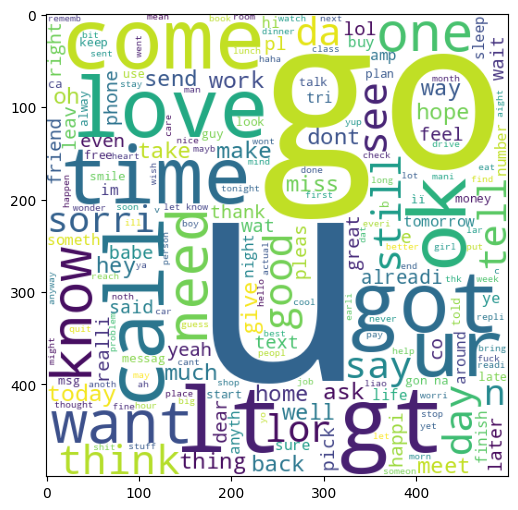

In [118]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [119]:
df.head()

,target,email,number_of_character,number_of_word,number_of_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [120]:
# to get About method in number

In [121]:
df[df['target']==1]['transform_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [122]:
corpus_spam = []
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    corpus_spam.append(word)

In [123]:
len(corpus_spam)
# total number of spam word

9939

In [124]:
# using the library to find the each word number of occurance
from collections import Counter
Counter(corpus_spam).most_common(20)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57)]

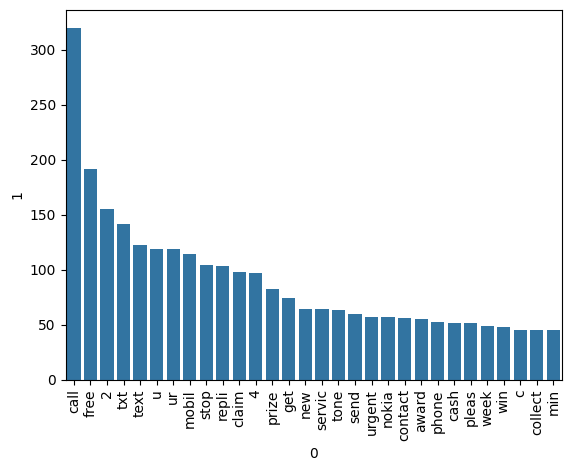

In [125]:
sns.barplot(x=pd.DataFrame(Counter(corpus_spam).most_common(30))[0],y=pd.DataFrame(Counter(corpus_spam).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [126]:
corpus_ham = []
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():
    corpus_ham.append(word)

In [127]:
len(corpus_ham)

35404

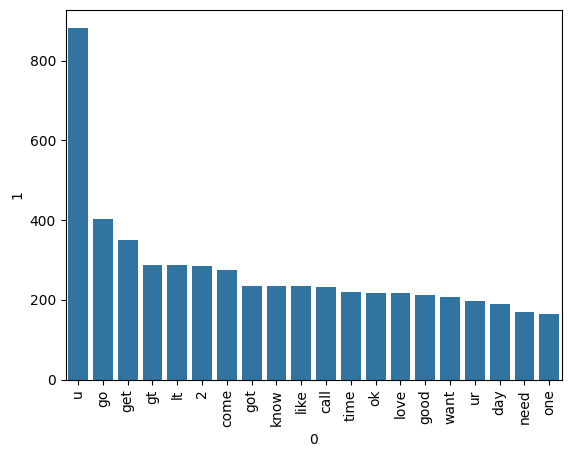

In [128]:
sns.barplot(x=pd.DataFrame(Counter(corpus_ham).most_common(20))[0],y=pd.DataFrame(Counter(corpus_ham).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [129]:
# Text tokenization using bag of words
print(df.shape)
df.sample(5)

(5169, 6)


,target,email,number_of_character,number_of_word,number_of_sentence,transform_text
1155,0,"Sorry man, accidentally left my phone on silen...",91,20,1,sorri man accident left phone silent last nigh...
19,1,England v Macedonia - dont miss the goals/team...,156,28,2,england v macedonia dont miss news txt ur nati...
1137,0,LOL ... No just was busy,24,6,1,lol busi
3733,0,"4 tacos + 1 rajas burrito, right?",33,9,1,4 taco 1 raja burrito right
1128,1,Ur HMV Quiz cash-balance is currently å£500 - ...,105,19,1,ur hmv quiz current maxim ur send hmv1 86688


In [130]:
df = df.drop('email',axis=1)

# Model building

In [131]:
df.sample(5)

,target,number_of_character,number_of_word,number_of_sentence,transform_text
1754,0,62,15,2,schedul next week town weekend
2235,0,136,21,2,listened2th plaid gd new air1 boughtåóbraindan...
2779,0,29,7,1,well might come
69,0,34,9,1,plane give month end
2132,1,137,25,4,b4u voucher marsm log onto discount credit opt...


In [132]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [133]:
X = tfidf.fit_transform(df['transform_text']).toarray()
X.shape

(5169, 3000)

In [137]:
# Exract the number columns as a sperate array
X_num = df.drop(['transform_text','target'],axis=1).values
X_num.shape

(5169, 3)

In [138]:
# Combine X with X_num
X = np.hstack((X,X_num))
X.shape

(5169, 3003)

In [139]:
y = df['target'].values
y.shape

(5169,)

In [140]:
X[:5]

array([[  0.,   0.,   0., ..., 111.,  24.,   2.],
       [  0.,   0.,   0., ...,  29.,   8.,   2.],
       [  0.,   0.,   0., ..., 155.,  37.,   2.],
       [  0.,   0.,   0., ...,  49.,  13.,   1.],
       [  0.,   0.,   0., ...,  61.,  15.,   1.]])

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [142]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [143]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 109]
 [ 21 114]]
0.5112107623318386


In [145]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.941972920696325
[[899   0]
 [ 60  75]]
1.0


In [146]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[898   1]
 [ 30 105]]
0.9905660377358491


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [162]:
svc = SVC(kernel='rbf', gamma='scale',class_weight='balanced')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2,algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [158]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [159]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy,precision

In [163]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.844294003868472, 0.44537815126050423)

In [161]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC
Accuracy -  0.8694390715667312
Precision -  0.0
For KN
Accuracy -  0.9197292069632496
Precision -  0.7549019607843137
For NB
Accuracy -  0.941972920696325
Precision -  1.0
For DT
Accuracy -  0.9352030947775629
Precision -  0.8148148148148148
For LR
Accuracy -  0.9497098646034816
Precision -  0.8807339449541285
For RF
Accuracy -  0.9632495164410058
Precision -  0.9801980198019802
For AdaBoost
Accuracy -  0.9294003868471954
Precision -  0.8444444444444444
For BgC
Accuracy -  0.9535783365570599
Precision -  0.8849557522123894
For ETC
Accuracy -  0.9738878143133463
Precision -  0.990909090909091
For GBDT
Accuracy -  0.9390715667311412
Precision -  0.9
For xgb
Accuracy -  0.9613152804642167
Precision -  0.9279279279279279


In [164]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [165]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.941973,1.000000
8,ETC,0.973888,0.990909
5,RF,0.963250,0.980198
10,xgb,0.961315,0.927928
9,GBDT,0.939072,0.900000
7,BgC,0.953578,0.884956
4,LR,0.949710,0.880734
6,AdaBoost,0.929400,0.844444
3,DT,0.935203,0.814815
1,KN,0.919729,0.754902


In [166]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.941973
1,ETC,Accuracy,0.973888
2,RF,Accuracy,0.963250
3,xgb,Accuracy,0.961315
4,GBDT,Accuracy,0.939072
5,BgC,Accuracy,0.953578
6,LR,Accuracy,0.949710
7,AdaBoost,Accuracy,0.929400
8,DT,Accuracy,0.935203
9,KN,Accuracy,0.919729


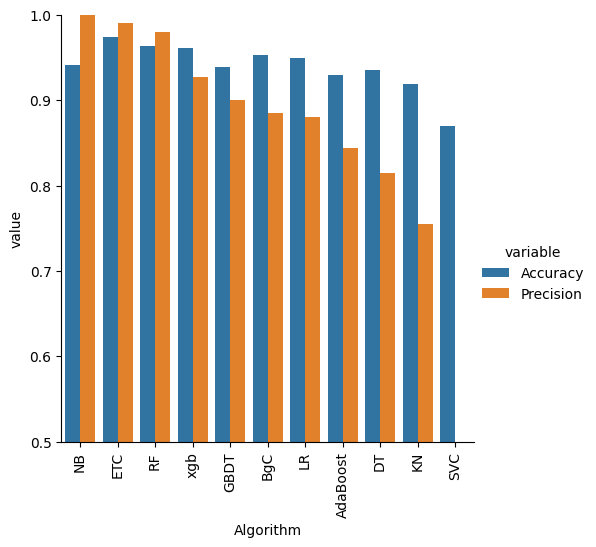

In [170]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

# **`                                                    Complete `**